In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from neural_network import Network
from activations import Tanh, Sigmoid, ReLU
from layers import ActivationLayer, FCLayer
from losses import MSE

np.random.seed(7)

feature_names = ['Sex', 'Age', 'SibSp', 'Pclass', 'Parch', 'Fare', 'Embarked']
target_name = 'Survived'

dataset = pd.read_csv("train.csv")
dataset.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from sklearn.model_selection import train_test_split


dataset = dataset[feature_names + [target_name]].dropna()

X = dataset[feature_names]
y = dataset[[target_name]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [4]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
    )

encoder = OrdinalEncoder()
X_train['Sex'] = encoder.fit_transform(X_train[['Sex']])
X_test['Sex'] = encoder.transform(X_test[['Sex']])

encoder = OrdinalEncoder()
X_train['Embarked'] = encoder.fit_transform(X_train[['Embarked']])
X_test['Embarked'] = encoder.transform(X_test[['Embarked']])


scaler = StandardScaler()
X_train = X_train.values
X_test = X_test.values
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((569, 7), (569, 1), (143, 7), (143, 1))

In [5]:
from sklearn.preprocessing import scale

scale([[0, 50, 0.3, 5], [1, 30, 0.2, 3], [0, 20, 0.2, 2]])

array([[-0.70710678,  1.33630621,  1.41421356,  1.33630621],
       [ 1.41421356, -0.26726124, -0.70710678, -0.26726124],
       [-0.70710678, -1.06904497, -0.70710678, -1.06904497]])

In [6]:
X_train = X_train.reshape((569, 1, 7))
y_train = y_train.values.reshape((569, 1, 1))

# Only for tanh
# How would this encoding change if you use sigmoid in the last layer?
y_train[y_train == 1] = 1
y_train[y_train == 0] = -1


X_test = X_test.reshape((143, 1, 7))
y_test = y_test.values.reshape((143, 1, 1))

# Only for tanh
# How would this encoding change if you use sigmoid in the last layer?
y_test[y_test == 1] = 1
y_test[y_test == 0] = -1

In [7]:
net = Network()

net.add(FCLayer(7, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 50))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(50, 20))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(20, 10))
net.add(ActivationLayer(Tanh()))
net.add(FCLayer(10, 1))
net.add(ActivationLayer(Tanh()))

net.use(MSE())
net.fit(X_train, y_train, epochs=500, learning_rate=0.001)

Epoch: 499 | Train loss: 0.2651: 100%|██████████| 500/500 [00:32<00:00, 15.59it/s]


Text(0, 0.5, 'Loss')

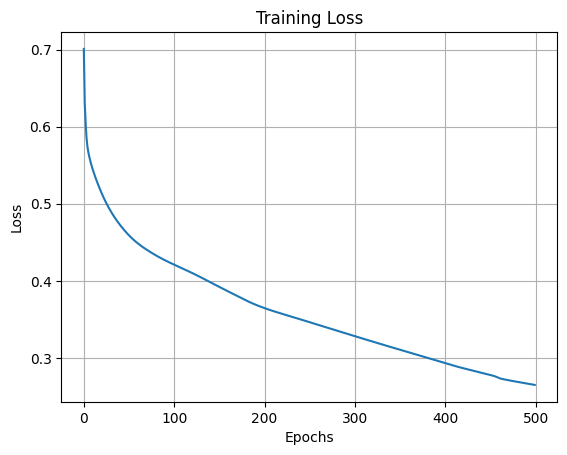

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(500), net.err_log)
plt.grid(True)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

[[72 13]
 [12 46]]


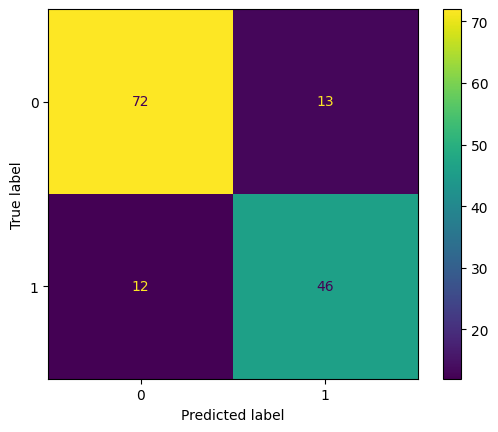

In [9]:
# How would this threshold change if you use sigmoid in the last layer?
threshold = 0

y_pred = net.predict(X_test)
y_pred = [1 if p[0][0] >= threshold else 0 for p in y_pred]
y_true = [1 if p[0][0] >= threshold else 0 for p in y_test]
print(confusion_matrix(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred);

In [10]:
print(classification_report(y_pred, y_true, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        84
           1       0.79      0.78      0.79        59

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.83      0.82       143



In [11]:
# See how they are implemented in sklearn
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

def my_accuracy(y_true, y_pred):
    ############# YOUR CODE #############
    pass

def my_precision(y_true, y_pred):
    ############# YOUR CODE #############
    pass

def my_recall(y_true, y_pred):
    ############# YOUR CODE #############
    pass

def my_confusion_matrix(y_true, y_pred):
    ############# YOUR CODE #############
    pass

# See what average="binary" means in sklearn documentation
assert my_accuracy(y_true, y_pred) == accuracy_score(y_true, y_pred)
assert my_recall(y_true, y_pred) == recall_score(y_true, y_pred, average='binary')
assert my_precision(y_true, y_pred) == precision_score(y_true, y_pred, average='binary')
assert all(my_confusion_matrix(y_true, y_pred) == my_confusion_matrix(y_true, y_pred))

AssertionError: 